In [1]:
import pandas as pd

df = pd.read_csv('salaries.csv')

df.head()

,Years of Experience,Education Level,Age,Location Factor,Salary
0,29,1,49,7,124204
1,27,3,45,4,125948
2,20,4,41,8,116078
3,14,4,37,5,106486
4,20,3,42,7,113297


In [2]:
df.shape

(1000, 5)

In [3]:
X = df.drop('Salary', axis=1)
y = df['Salary']

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9594068613513749

<Axes: xlabel='Age', ylabel='Salary'>

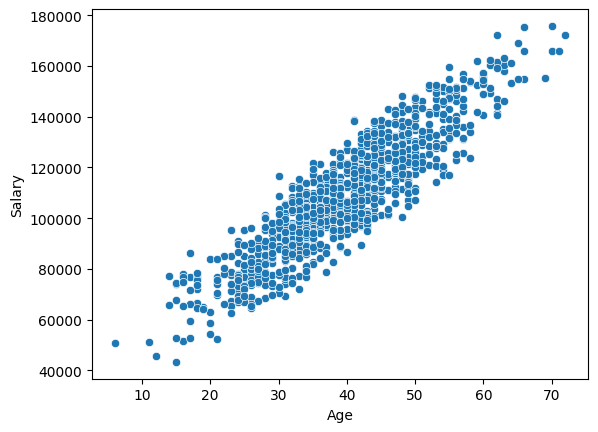

In [5]:
import seaborn as sns

sns.scatterplot(df, x='Age', y='Salary')

In [6]:
### VIF

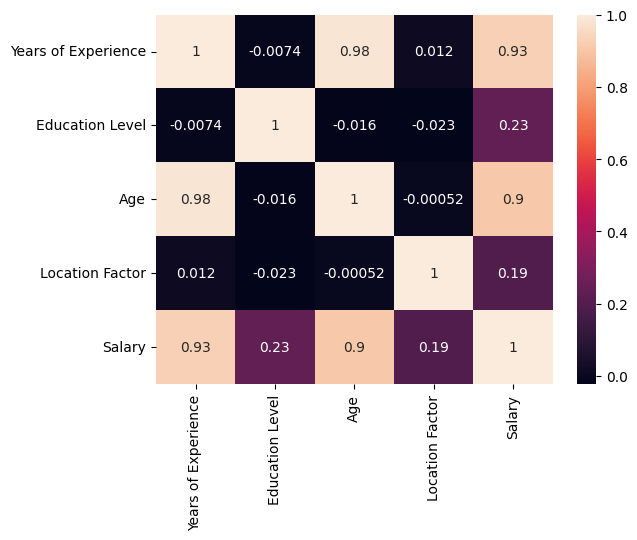

In [8]:
import matplotlib.pyplot as plt

cm = df.corr()

sns.heatmap(cm, annot=True)
plt.show()

In [9]:
cm['Salary']

Years of Experience    0.928056
Education Level        0.233571
Age                    0.904480
Location Factor        0.192238
Salary                 1.000000
Name: Salary, dtype: float64

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Variable'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_df


In [11]:
X = df.drop('Salary', axis=1)

calculate_vif(X)

,Variable,VIF
0,Years of Experience,22.342087
1,Education Level,5.472969
2,Age,42.201149
3,Location Factor,4.289467


In [12]:
calculate_vif(X.drop('Age', axis=1))

,Variable,VIF
0,Years of Experience,3.198601
1,Education Level,3.509425
2,Location Factor,3.231181


In [15]:
calculate_vif(X.drop('Years of Experience', axis=1))

,Variable,VIF
0,Education Level,4.536426
1,Age,6.041720
2,Location Factor,3.812980


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X.drop('Age', axis=1), y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9592314656682582